In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [30]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
X = df

In [33]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [34]:
Y = (df['math score'] + df['reading score'] + df['writing score'])/3

In [35]:
Y


0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [36]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [37]:
X = preprocessor.fit_transform(X)

In [38]:
X


array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]], shape=(1000, 20))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [40]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_sq = r2_score(true, predicted)
    return mae, mse, rmse, r2_sq

In [48]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('\n\n')
    



Linear Regression
Model performance for Training set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000



Lasso
Model performance for Training set
- Mean Squared Error: 0.8506
- Root Mean Squared Error: 1.0645
- Mean Absolute Error: 1.1332
- R2 Score: 0.9943
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.8769
- Root Mean Squared Error: 1.1142
- Mean Absolute Error: 1.2414
- R2 Score: 0.9942



Ridge
Model performance for Training set
- Mean Squared Error: 0.0065
- Root Mean Squared Error: 0.0080
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.0067
- Root Mean Squared Error: 0.0088
- Mean Absolute Error: 0.0001
- R2 Sco

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
6,XGBRegressor,0.994748
1,Lasso,0.994209
5,Random Forest Regressor,0.994155
7,CatBoosting Regressor,0.993447
4,Decision Tree,0.987851
8,AdaBoost Regressor,0.978350
3,K-Neighbors Regressor,0.956016


In [50]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the XGBoost model is %.2f" % score)


Accuracy of the XGBoost model is 99.47


Text(0, 0.5, 'Predicted')

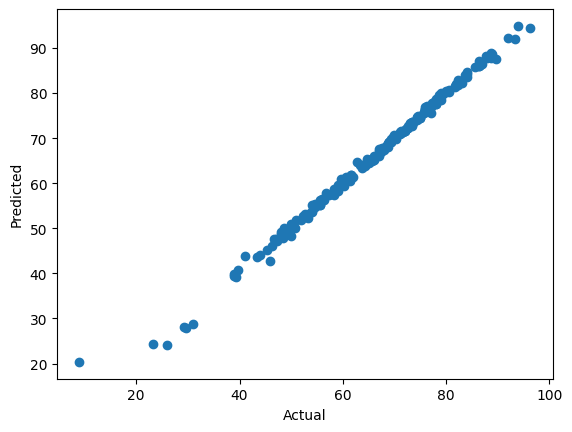

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

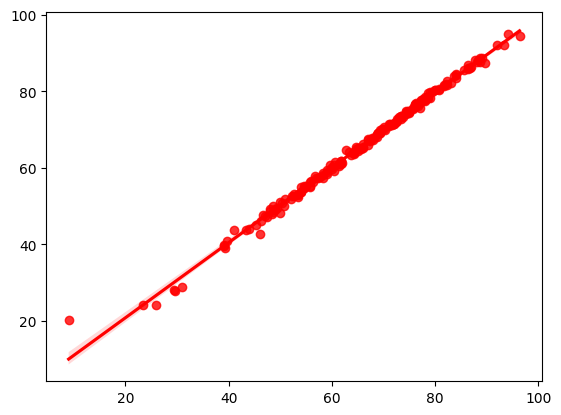

In [ ]:
sns.regplot(x=y_test,y=y_pred,color ='red')     

In [55]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,86.365891,0.634109
737,64.000000,63.829182,0.170818
740,75.000000,74.603813,0.396187
660,74.666667,74.902534,-0.235868
411,81.666667,81.645668,0.020999
...,...,...,...
408,55.000000,55.357475,-0.357475
332,57.000000,57.318279,-0.318279
208,77.000000,76.994682,0.005318
613,72.000000,71.822426,0.177574
